In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pywt

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

df = pd.read_csv('data.csv')
df = df[['index5','index4','index3','index2','index1', 'A5','A4','A3','A2','A1']]
df['index1'].min(), df['index1'].max()

(1.0, 17.0)

In [ ]:
df['index2'].min(), df['index2'].max()

(1.0, 17.0)

In [ ]:
df['index3'].min(), df['index3'].max()

(1.0, 29.0)

In [ ]:
df['index4'].min(), df['index4'].max()

(1.0, 53.0)

In [ ]:
df['index5'].min(), df['index5'].max()

(1, 102)

In [ ]:
fig5 = go.Figure()
fig4 = go.Figure()
fig3 = go.Figure()
fig2 = go.Figure()
fig1 = go.Figure()
fig5.add_trace(go.Scatter(x=df['index5'], y=df['A5'], name='temperature'))
fig5.update_layout(showlegend=True, title='Coeff5')
fig4.add_trace(go.Scatter(x=df['index4'], y=df['A4'], name='temperature'))
fig4.update_layout(showlegend=True, title='coeff4n')
fig3.add_trace(go.Scatter(x=df['index3'], y=df['A3'], name='temperature'))
fig3.update_layout(showlegend=True, title='coef3')
fig2.add_trace(go.Scatter(x=df['index2'], y=df['A4'], name='temperature'))
fig2.update_layout(showlegend=True, title='coeff2')
fig1.add_trace(go.Scatter(x=df['index1'], y=df['A2'], name='temperature'))
fig1.update_layout(showlegend=True, title='coeff1')
fig5.show()
fig4.show()
fig3.show()
fig2.show()
fig1.show()



In [ ]:
train1, test1 = df.loc[df['index1'] <= 8], df.loc[df['index1'] > 8]
train2, test2 = df.loc[df['index2'] <= 8], df.loc[df['index2'] > 8]
train3, test3 = df.loc[df['index3'] <= 14], df.loc[df['index3'] > 14]
train4, test4 = df.loc[df['index4'] <= 26], df.loc[df['index4'] > 26]
train5, test5 = df.loc[df['index5'] <= 51], df.loc[df['index5'] > 51]
train1.shape, test1.shape

((8, 10), (9, 10))

In [ ]:
train2.shape, test2.shape

((8, 10), (9, 10))

In [ ]:
train3.shape, test3.shape

((14, 10), (15, 10))

In [ ]:
train4.shape, test4.shape

((26, 10), (27, 10))

In [ ]:
train5.shape, test5.shape

((51, 10), (51, 10))

In [ ]:
scaler = StandardScaler()
scaler1 = scaler.fit(train1[['A1']])
scaler2 = scaler.fit(train2[['A2']])
scaler3 = scaler.fit(train3[['A3']])
scaler4 = scaler.fit(train4[['A4']])
scaler5 = scaler.fit(train5[['A5']])



In [ ]:
train1['A1'] = scaler1.transform(train1[['A1']])
test1['A1'] = scaler1.transform(test1[['A1']])
train2['A2'] = scaler2.transform(train2[['A2']])
test2['A2'] = scaler2.transform(test2[['A2']])
train3['A3'] = scaler3.transform(train3[['A3']])
test3['A3'] = scaler3.transform(test3[['A3']])
train4['A4'] = scaler4.transform(train4[['A4']])
test4['A4'] = scaler4.transform(test4[['A4']])
train5['A5'] = scaler5.transform(train5[['A5']])
test5['A5'] = scaler5.transform(test5[['A5']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
TIME_STEPS=1

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train1, y_train1 = create_sequences(train1[['A1']], train1['A1'])
X_test1, y_test1 = create_sequences(test1[['A1']], test1['A1'])

X_train2, y_train2 = create_sequences(train2[['A2']], train2['A2'])
X_test2, y_test2 = create_sequences(test2[['A2']], test2['A2'])

X_train3, y_train3 = create_sequences(train3[['A3']], train3['A3'])
X_test3, y_test3= create_sequences(test3[['A3']], test3['A3'])

X_train4, y_train4 = create_sequences(train4[['A4']], train4['A4'])
X_test4, y_test4 = create_sequences(test4[['A4']], test4['A4'])

X_train5, y_train5 = create_sequences(train5[['A5']], train5['A5'])
X_test5, y_test5 = create_sequences(test5[['A5']], test5['A5'])

print(f'Training shape: {X_train1.shape}')
print(f'Testing shape: {X_test1.shape}')

Training shape: (7, 1, 1)
Testing shape: (8, 1, 1)


In [ ]:
model1 = Sequential()
model1.add(LSTM(128, input_shape=(X_train1.shape[1], X_train1.shape[2])))
model1.add(Dropout(rate=0.2))
model1.add(RepeatVector(X_train1.shape[1]))
model1.add(LSTM(128, return_sequences=True))
model1.add(Dropout(rate=0.2))
model1.add(TimeDistributed(Dense(X_train1.shape[2])))
model1.compile(optimizer='adam', loss='mae')
model1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
repeat_vector_20 (RepeatVect (None, 1, 128)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 1, 128)            131584    
_________________________________________________________________
dropout_41 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
time_distributed_20 (TimeDis (None, 1, 1)              129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_______________________________________________

In [ ]:
model2 = Sequential()
model2.add(LSTM(128, input_shape=(X_train2.shape[1], X_train2.shape[2])))
model2.add(Dropout(rate=0.2))
model2.add(RepeatVector(X_train2.shape[1]))
model2.add(LSTM(128, return_sequences=True))
model2.add(Dropout(rate=0.2))
model2.add(TimeDistributed(Dense(X_train2.shape[2])))
model2.compile(optimizer='adam', loss='mae')
model2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_42 (Dropout)         (None, 128)               0         
_________________________________________________________________
repeat_vector_21 (RepeatVect (None, 1, 128)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 1, 128)            131584    
_________________________________________________________________
dropout_43 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
time_distributed_21 (TimeDis (None, 1, 1)              129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_______________________________________________

In [ ]:
model3= Sequential()
model3.add(LSTM(128, input_shape=(X_train3.shape[1], X_train3.shape[2])))
model3.add(Dropout(rate=0.2))
model3.add(RepeatVector(X_train3.shape[1]))
model3.add(LSTM(128, return_sequences=True))
model3.add(Dropout(rate=0.2))
model3.add(TimeDistributed(Dense(X_train3.shape[2])))
model3.compile(optimizer='adam', loss='mae')
model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)               0         
_________________________________________________________________
repeat_vector_22 (RepeatVect (None, 1, 128)            0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 1, 128)            131584    
_________________________________________________________________
dropout_45 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
time_distributed_22 (TimeDis (None, 1, 1)              129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_______________________________________________

In [ ]:
model4 = Sequential()
model4.add(LSTM(128, input_shape=(X_train4.shape[1], X_train4.shape[2])))
model4.add(Dropout(rate=0.2))
model4.add(RepeatVector(X_train4.shape[1]))
model4.add(LSTM(128, return_sequences=True))
model4.add(Dropout(rate=0.2))
model4.add(TimeDistributed(Dense(X_train4.shape[2])))
model4.compile(optimizer='adam', loss='mae')
model4.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_46 (Dropout)         (None, 128)               0         
_________________________________________________________________
repeat_vector_23 (RepeatVect (None, 1, 128)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 1, 128)            131584    
_________________________________________________________________
dropout_47 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
time_distributed_23 (TimeDis (None, 1, 1)              129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_______________________________________________

In [ ]:
model5 = Sequential()
model5.add(LSTM(128, input_shape=(X_train5.shape[1], X_train5.shape[2])))
model5.add(Dropout(rate=0.2))
model5.add(RepeatVector(X_train5.shape[1]))
model5.add(LSTM(128, return_sequences=True))
model5.add(Dropout(rate=0.2))
model5.add(TimeDistributed(Dense(X_train5.shape[2])))
model5.compile(optimizer='adam', loss='mae')
model5.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
repeat_vector_24 (RepeatVect (None, 1, 128)            0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 1, 128)            131584    
_________________________________________________________________
dropout_49 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 1, 1)              129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_______________________________________________

In [ ]:
history1 = model1.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 2224.7720 - val_loss: 2221.2126
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 2224.6965 - val_loss: 2221.1184
Epoch 3/100
1/1 [==============================] - 0s 51ms/step - loss: 2224.5867 - val_loss: 2221.0198
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 2224.5195 - val_loss: 2220.9207
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 2224.3860 - val_loss: 2220.8242
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 2224.2666 - val_loss: 2220.7275
Epoch 7/100
1/1 [==============================] - 0s 56ms/step - loss: 2224.1160 - val_loss: 2220.6284
Epoch 8/100
1/1 [==============================] - 0s 51ms/step - loss: 2224.1011 - val_loss: 2220.5278
Epoch 9/100
1/1 [==============================] - 0s 59ms/step - loss: 2224.0911 - val_loss: 2220.4258
Epoch 10/100
1/1 [==============================] - 0s 55ms/step -

In [ ]:
history2 = model2.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.7550 - val_loss: 0.2004
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 0.7521 - val_loss: 0.2025
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 0.7479 - val_loss: 0.2045
Epoch 4/100
1/1 [==============================] - 0s 63ms/step - loss: 0.7481 - val_loss: 0.2064


In [ ]:
history3 = model3.fit(X_train3, y_train3, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.5327 - val_loss: 1.2895
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 0.5317 - val_loss: 1.2918
Epoch 3/100
1/1 [==============================] - 0s 56ms/step - loss: 0.5315 - val_loss: 1.2939
Epoch 4/100
1/1 [==============================] - 0s 54ms/step - loss: 0.5298 - val_loss: 1.2962


In [ ]:
history4 = model4.fit(X_train4, y_train4, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.7707 - val_loss: 0.2549
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 0.7692 - val_loss: 0.2548
Epoch 3/100
1/1 [==============================] - 0s 53ms/step - loss: 0.7686 - val_loss: 0.2550
Epoch 4/100
1/1 [==============================] - 0s 57ms/step - loss: 0.7681 - val_loss: 0.2553
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7687 - val_loss: 0.2556


In [ ]:
history5 = model5.fit(X_train5, y_train5, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
2/2 [==============================] - 4s 846ms/step - loss: 0.8535 - val_loss: 0.0800
Epoch 2/100
2/2 [==============================] - 0s 50ms/step - loss: 0.8475 - val_loss: 0.0817
Epoch 3/100
2/2 [==============================] - 0s 50ms/step - loss: 0.8435 - val_loss: 0.0862
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 0.8401 - val_loss: 0.0918


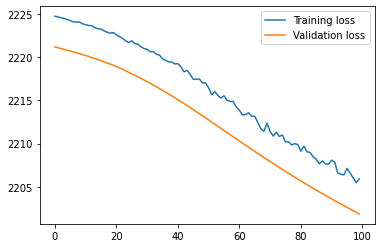

In [ ]:
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
model1.evaluate(X_test1, y_test1)

1/1 [==============================] - 0s 18ms/step - loss: 2201.8435


2201.843505859375

In [ ]:
model1.evaluate(X_test1, y_test1)

1/1 [==============================] - 0s 17ms/step - loss: 2201.8435


2201.843505859375

In [ ]:
model2.evaluate(X_test2, y_test2)

1/1 [==============================] - 0s 18ms/step - loss: 0.8419


0.8419318199157715

In [ ]:
model3.evaluate(X_test3, y_test3)

1/1 [==============================] - 0s 19ms/step - loss: 0.6945


0.6944641470909119

In [ ]:
model4.evaluate(X_test4, y_test4)

1/1 [==============================] - 0s 17ms/step - loss: 0.8236


0.8235554099082947

In [ ]:
model5.evaluate(X_test5, y_test5)

2/2 [==============================] - 0s 5ms/step - loss: 0.8269


0.8268847465515137

In [ ]:
X_train_pred1 = model1.predict(X_train1, verbose=0)
X_train_pred2 = model2.predict(X_train2, verbose=0)
X_train_pred3 = model3.predict(X_train3, verbose=0)
X_train_pred4 = model4.predict(X_train4, verbose=0)
X_train_pred5 = model5.predict(X_train5, verbose=0)
train_mae_loss1 = np.mean(np.abs(X_train_pred1 - X_train1), axis=1)
train_mae_loss2 = np.mean(np.abs(X_train_pred2 - X_train2), axis=1)
train_mae_loss3 = np.mean(np.abs(X_train_pred3 - X_train3), axis=1)
train_mae_loss4 = np.mean(np.abs(X_train_pred4 - X_train4), axis=1)
train_mae_loss5 = np.mean(np.abs(X_train_pred5 - X_train5), axis=1)
threshold1 = np.max(train_mae_loss1)
threshold2 = np.max(train_mae_loss2)
threshold3 = np.max(train_mae_loss3)
threshold4 = np.max(train_mae_loss4)
threshold5 = np.max(train_mae_loss5)

X_test_pred1 = model1.predict(X_test1, verbose=0)
X_test_pred2 = model2.predict(X_test2, verbose=0)
X_test_pred3 = model3.predict(X_test3, verbose=0)
X_test_pred4 = model4.predict(X_test4, verbose=0)
X_test_pred5 = model5.predict(X_test5, verbose=0)
test_mae_loss1 = np.mean(np.abs(X_test_pred1-X_test1), axis=1)
test_mae_loss2 = np.mean(np.abs(X_test_pred2-X_test2), axis=1)
test_mae_loss3 = np.mean(np.abs(X_test_pred3-X_test3), axis=1)
test_mae_loss4 = np.mean(np.abs(X_test_pred4-X_test4), axis=1)
test_mae_loss5 = np.mean(np.abs(X_test_pred5-X_test5), axis=1)

In [ ]:
test_score_df1 = pd.DataFrame(test1[TIME_STEPS:])
test_score_df1['loss'] = test_mae_loss1
test_score_df1['threshold'] = threshold1
test_score_df1['anomaly'] = test_score_df1['loss'] > test_score_df1['threshold']
test_score_df1['A1'] = test1[TIME_STEPS:]['A1']

test_score_df2 = pd.DataFrame(test2[TIME_STEPS:])
test_score_df2['loss'] = test_mae_loss2
test_score_df2['threshold'] = threshold2
test_score_df2['anomaly'] = test_score_df2['loss'] > test_score_df2['threshold']
test_score_df2['A2'] = test2[TIME_STEPS:]['A2']

test_score_df3 = pd.DataFrame(test3[TIME_STEPS:])
test_score_df3['loss'] = test_mae_loss3
test_score_df3['threshold'] = threshold3
test_score_df3['anomaly'] = test_score_df3['loss'] > test_score_df3['threshold']
test_score_df3['A3'] = test3[TIME_STEPS:]['A3']

test_score_df4 = pd.DataFrame(test4[TIME_STEPS:])
test_score_df4['loss'] = test_mae_loss4
test_score_df4['threshold'] = threshold4
test_score_df4['anomaly'] = test_score_df4['loss'] > test_score_df4['threshold']
test_score_df4['A4'] = test4[TIME_STEPS:]['A4']

test_score_df5 = pd.DataFrame(test5[TIME_STEPS:])
test_score_df5['loss'] = test_mae_loss5
test_score_df5['threshold'] = threshold5
test_score_df5['anomaly'] = test_score_df5['loss'] > test_score_df5['threshold']
test_score_df5['A5'] = test5[TIME_STEPS:]['A5']
fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()
fig4 = go.Figure()
fig5 = go.Figure()
fig1.add_trace(go.Scatter(x=test_score_df1['index1'], y=test_score_df1['loss'], name='Test loss'))
fig1.add_trace(go.Scatter(x=test_score_df1['index1'], y=test_score_df1['threshold'], name='Threshold'))

fig2.add_trace(go.Scatter(x=test_score_df2['index2'], y=test_score_df2['loss'], name='Test loss'))
fig2.add_trace(go.Scatter(x=test_score_df2['index2'], y=test_score_df2['threshold'], name='Threshold'))

fig3.add_trace(go.Scatter(x=test_score_df3['index3'], y=test_score_df3['loss'], name='Test loss'))
fig3.add_trace(go.Scatter(x=test_score_df4['index3'], y=test_score_df3['threshold'], name='Threshold'))

fig4.add_trace(go.Scatter(x=test_score_df4['index4'], y=test_score_df4['loss'], name='Test loss'))
fig4.add_trace(go.Scatter(x=test_score_df4['index4'], y=test_score_df4['threshold'], name='Threshold'))

fig5.add_trace(go.Scatter(x=test_score_df5['index5'], y=test_score_df5['loss'], name='Test loss'))
fig5.add_trace(go.Scatter(x=test_score_df5['index5'], y=test_score_df5['threshold'], name='Threshold'))

fig1.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig2.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig3.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig4.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig5.update_layout(showlegend=True, title='Test loss vs. Threshold')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()


In [ ]:
anomalies1 = test_score_df1.loc[test_score_df1['anomaly'] == True]
anomalies1.shape

(0, 13)

In [ ]:
anomalies2 = test_score_df2.loc[test_score_df2['anomaly'] == True]
anomalies2.shape

(1, 13)

In [ ]:
anomalies3 = test_score_df3.loc[test_score_df3['anomaly'] == True]
anomalies3.shape

(4, 13)

In [ ]:
anomalies4 = test_score_df4.loc[test_score_df4['anomaly'] == True]
anomalies4.shape

(2, 13)

In [ ]:
anomalies5 = test_score_df5.loc[test_score_df5['anomaly'] == True]
anomalies5.shape

(1, 13)

In [ ]:
x1= anomalies1['index1']
x2= anomalies2['index2']
x3= anomalies3['index3']
x4= anomalies4['index4']
x5= anomalies5['index5']
Y1,Y2,Y3,Y4,Y5=[],[],[],[],[]

  

In [ ]:
for j in anomalies1['A1']:
    Y1.append(j)
for j in anomalies2['A2']:
    Y2.append(j)
for j in anomalies3['A3']:
    Y3.append(j)
for j in anomalies4['A4']:
    Y4.append(j)
for j in anomalies5['A5']:
    Y5.append(j)  

v5=[]

for j in range(100):
    v5.append(0) 

X1,X2,X3,X4,X5=pywt.wavedec(v5,'db3',level=4, mode='sym')


In [ ]:
j=0
for i in anomalies5['index5']:
        X5[i-52]=Y5[j]
        j=j+1
j=0
for i in anomalies4['index5']:
       X4[i-29]=Y4[j]
       j=j+1
j=0
for i in anomalies3['index5']:
       X3[i-15]=Y3[j]
       j=j+1
j=0
for i in anomalies2['index5']:
       X2[i-9]=Y2[j]
       j=j+1
j=0
for i in anomalies1['index5']:
       X1[i-9]=Y1[j]
       j=j+1


In [ ]:
X1_=pywt.threshold(X1,1000, 'hard')
X2_=pywt.threshold(X2,1000, 'hard')
X3_=pywt.threshold(X3,1000, 'hard')
coeff_ =X1_,X2_,X3_,X4,X5
y_= pywt.waverec(coeff_, 'db3')
print(y_)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.0031616  -0.00766844 -0.01203898 -0.01731669  0.00232868  0.03216806
  0.05999485  0.09438144 -0.01847445 -0.19112071 -0.08085435  0.10618058
  0.05987428 -0.01978583 -0.0247219  -0.03820152  0.06536041  0.22263208
 

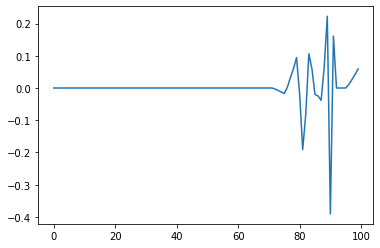

In [ ]:
T=[]
for j in range(100):
    T.append(j)

plt.plot(T,y_) 
plt.show()
